In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from pylab import *
from matplotlib.animation import FuncAnimation
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from time import sleep


<IPython.core.display.Javascript object>


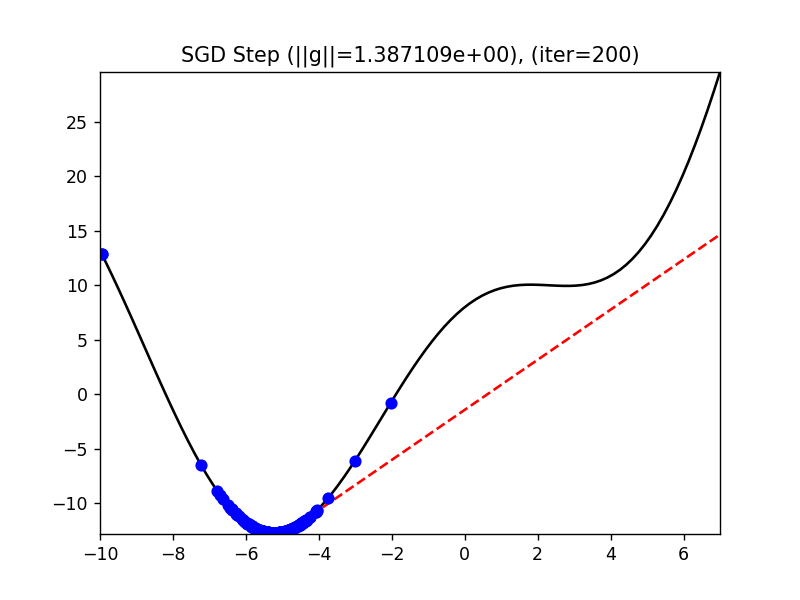

Text(0.5,1,"Use 'd'/'f' for GD, 'r'/'t' for SGD!")

In [31]:
def whipe():
    global Bh,Bl,ax
    ax.cla()
    ax.set_ylim([min(ys)-0.1,max(ys)])
    ax.set_xlim([min(xs),max(xs)])
    ax.plot(xs,ys,'k-')
    Bh,=plot(BX,f(BX),'ro')
    Bl,=plot(xs,xs*0-13.5,'r--')


def onclick(event):
    global BX,Bh,itera;
    BX=event.xdata;
    Bh.set_xdata(BX);
    Bh.set_ydata(f(BX))
    itera=1
    whipe()
    title("Use 'd'/'f' for GD, 'r'/'t' for SGD!")
    
def onkey(event):
    global BX,Bh,Bl,s,itera,running
    d=df(BX)
    h=ddf(BX)
    plot([BX],[f(BX)],'bo')

    gx=Bl.get_xdata()


    
    if event.key == 'd' or event.key=='f':
        gys=f(BX)+(gx-BX)*d
        Bl.set_ydata(gys)
        
        BX-=d*s*np.sqrt(1.0/itera)
        Bh.set_xdata(BX);
        Bh.set_ydata(f(BX))
        title('Gradient Step (||g||=%e)' % np.linalg.norm(d))

    if event.key=='n':
        gys=f(BX)+(gx-BX)*d+0.5*(gx-BX)*h*(gx-BX) # quadratic approximation
        Bl.set_ydata(gys)
        
        BX-=d/h
        Bh.set_xdata(BX);
        Bh.set_ydata(f(BX))
        title('Newton Step (||g||=%e)' % np.linalg.norm(d))
        
    if event.key=='r' or event.key=='t':
        d += np.random.uniform(-10,10)
        gys=f(BX)+(gx-BX)*d
        Bl.set_ydata(gys)
        itera = itera+1
        
        BX-=d*s*np.sqrt(1.0/itera)
        Bh.set_xdata(BX);
        Bh.set_ydata(f(BX))
        title('SGD Step (||g||=%e), (iter=%d)' % (np.linalg.norm(d),itera))
        
    if event.key=='a' or event.key=='z':
        jump_size = 10
        itera_start = itera
        while (itera<itera_start+jump_size):
            d=df(BX)
            h=ddf(BX)
            plot([BX],[f(BX)],'bo')

            gx=Bl.get_xdata()
            
            title('SGD Step (||g||=%e), (iter=%d)' % (np.linalg.norm(d),itera))
            d += np.random.uniform(-10,10)
            gys=f(BX)+(gx-BX)*d
            Bl.set_ydata(gys)
            
            BX-=d*s*np.sqrt(1.0/itera)
            Bh.set_xdata(BX);
            Bh.set_ydata(f(BX))
            itera = itera+1

itera = 1
f=lambda x: x**2/3.0+8.0*x/3.0+8*np.cos(-1.7/3*x)
df=lambda x: 2*x/3.0+8.0/3.0+13.6/3*np.sin(-1.7/3*x)
ddf=lambda x: 2/3.0-13.6*1.7/9*np.cos(-1.7/3*x)

xs=linspace(-10,7,100)
ys=f(xs)
BX=0;   
Bh=None
Bl=None
s=0.48

%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)


whipe()
cid = fig.canvas.mpl_connect('button_press_event', onclick)
key = fig.canvas.mpl_connect('key_press_event', onkey)
title("Use 'd'/'f' for GD, 'r'/'t' for SGD!")

